In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Seeds Dataset

In [16]:
# Load seeds from https://archive.ics.uci.edu/ml/datasets/seeds
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'coefficient', 'groove length', 'varieties']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    header=None, delim_whitespace=True, names=columns)
seeds.head()

,area,perimeter,compactness,length,width,coefficient,groove length,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# DataFrame to NumPy Array
samples = seeds.iloc[:, :-1].values
varieties = seeds.iloc[:, -1].values
samples.shape, varieties.shape

((210, 7), (210,))

## How many clusters of grain?

In [5]:
ks = range(1, 6)
inertias = []

In [6]:
for k in ks:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

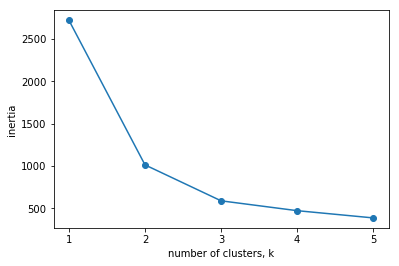

In [7]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the grain clustering

In [8]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)

In [9]:
# Use fit_predict to fit model and obtain cluster labels
labels = model.fit_predict(samples)

In [10]:
# Create a DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [11]:
# Show DataFrame
df.head()

,labels,varieties
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


In [45]:
# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

In [46]:
# Display ct
print(ct)

varieties   1   2   3
labels               
0           9   0  68
1           1  60   0
2          60  10   2
